In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re

# Web Scrapping

In [3]:
final=[]
prices=[]
ki=[]
for i in range(2,32):
    url = 'https://www.cartrade.com/buy-used-cars/bangalore/c/page-'+str(i)+'/#so=-1&sc=-1&city=2'
    #print(url)
    page=requests.get(url)
    soup=BeautifulSoup(page.content)
    
    for j in soup.find_all('a',class_='font-muli'): #tag = a for name,year,mnodel
        final.append(" ".join(re.findall('\w+',j.text)))
    for g in soup.find_all('div',class_='price_EMI font-muli'): # tag div for price
        prices.append(g.text)
    for i in soup.find_all('span',class_='carInfo'): # tag span for kms,fuel_type,location
        ki.append(i.text.strip())
len(final), len(prices), len(ki)

(720, 720, 720)

In [4]:
final[0:10]

['2016 Hyundai Creta 1 6 SX Plus AT 11 75 000 Make Offer 45 315 KMs Diesel Singasandra Bangalore CONTACT SELLER',
 '2021 Hyundai Creta SX O 1 5 Petrol CVT 2020 2022 16 85 000 Make Offer 15 925 KMs Petrol Singasandra Bangalore CONTACT SELLER',
 '2021 Hyundai Creta SX 1 5 Petrol Executive 14 65 000 Make Offer 5 070 KMs Petrol Singasandra Bangalore CONTACT SELLER',
 '2022 Mahindra XUV700 AX 7 Diesel AT AWD Luxury Pack 7 STR 2021 26 95 000 Make Offer 29 705 KMs Diesel Singasandra Bangalore CONTACT SELLER',
 '2018 Mahindra XUV500 W7 AT 2018 2020 13 45 000 Make Offer 49 131 KMs Diesel Singasandra Bangalore CONTACT SELLER',
 '2022 Tata Nexon XZ Plus Diesel Dark Edition 2021 2023 12 95 000 Make Offer 12 336 KMs Diesel Singasandra Bangalore CONTACT SELLER',
 '2020 BMW 3 Series 320d Sport Line 2016 2018 45 25 000 Make Offer 44 244 KMs Diesel BTM Layout Bangalore CONTACT SELLER',
 '2019 Maruti Suzuki Ertiga ZXi AT 10 80 000 Make Offer 48 486 KMs Petrol Singasandra Bangalore CONTACT SELLER',
 '202

In [5]:
price_pattern = re.compile(r'₹[\d,]+')

# Extracting and cleaning prices that match the pattern
clean_prices = [re.search(price_pattern, price.strip()).group(0) for price in prices if re.search(price_pattern, price.strip())]

len(clean_prices)


720

In [6]:
ki[0:5]

['45,315 KMs\n\t\t\t\t\t\t\t\t\t\t\t\t\t\xa0|\xa0\n\t\t\t\t\t\t\t\t\t\t\t\t\tDiesel\n\t\t\t\t\t\t\t\t\t\t\t\t\t\xa0|\xa0\n\t\t\t\t\t\t\t\t\t\t\t\t\tSingasandra, Bangalore',
 '15,925 KMs\n\t\t\t\t\t\t\t\t\t\t\t\t\t\xa0|\xa0\n\t\t\t\t\t\t\t\t\t\t\t\t\tPetrol\n\t\t\t\t\t\t\t\t\t\t\t\t\t\xa0|\xa0\n\t\t\t\t\t\t\t\t\t\t\t\t\tSingasandra, Bangalore',
 '5,070 KMs\n\t\t\t\t\t\t\t\t\t\t\t\t\t\xa0|\xa0\n\t\t\t\t\t\t\t\t\t\t\t\t\tPetrol\n\t\t\t\t\t\t\t\t\t\t\t\t\t\xa0|\xa0\n\t\t\t\t\t\t\t\t\t\t\t\t\tSingasandra, Bangalore',
 '29,705 KMs\n\t\t\t\t\t\t\t\t\t\t\t\t\t\xa0|\xa0\n\t\t\t\t\t\t\t\t\t\t\t\t\tDiesel\n\t\t\t\t\t\t\t\t\t\t\t\t\t\xa0|\xa0\n\t\t\t\t\t\t\t\t\t\t\t\t\tSingasandra, Bangalore',
 '49,131 KMs\n\t\t\t\t\t\t\t\t\t\t\t\t\t\xa0|\xa0\n\t\t\t\t\t\t\t\t\t\t\t\t\tDiesel\n\t\t\t\t\t\t\t\t\t\t\t\t\t\xa0|\xa0\n\t\t\t\t\t\t\t\t\t\t\t\t\tSingasandra, Bangalore']

In [7]:
kmfuelloc=[]
for i in ki:
    clean_text = re.sub(r'[\n\t\xa0]', '', i)
    kmfuelloc.append(clean_text)

In [8]:
len(kmfuelloc)

720

In [9]:
print(len(final))
print(len(clean_prices))
print(len(kmfuelloc))

720
720
720


In [10]:
df = pd.DataFrame({'Name': final,
    'Price': clean_prices,
    'Km': kmfuelloc})

In [11]:
df

,Name,Price,Km
0,2016 Hyundai Creta 1 6 SX Plus AT 11 75 000 Ma...,"₹11,75,000","45,315 KMs|Diesel|Singasandra, Bangalore"
1,2021 Hyundai Creta SX O 1 5 Petrol CVT 2020 20...,"₹16,85,000","15,925 KMs|Petrol|Singasandra, Bangalore"
2,2021 Hyundai Creta SX 1 5 Petrol Executive 14 ...,"₹14,65,000","5,070 KMs|Petrol|Singasandra, Bangalore"
3,2022 Mahindra XUV700 AX 7 Diesel AT AWD Luxury...,"₹26,95,000","29,705 KMs|Diesel|Singasandra, Bangalore"
4,2018 Mahindra XUV500 W7 AT 2018 2020 13 45 000...,"₹13,45,000","49,131 KMs|Diesel|Singasandra, Bangalore"
...,...,...,...
715,2018 Datsun redi GO A 2 51 000 Make Offer Home...,"₹2,51,000","16,113 KMs|Petrol|Banaswadi, Bangalore"
716,2014 Hyundai Xcent S 1 2 4 18 000 Make Offer H...,"₹4,18,000","63,189 KMs|Petrol|Banaswadi, Bangalore"
717,2021 Honda Amaze VX CVT 1 2 Petrol 2021 8 04 0...,"₹8,04,000","21,140 KMs|Petrol|Banaswadi, Bangalore"
718,2014 Honda City 1 5 V MT 5 69 092 Make Offer H...,"₹5,69,092","73,554 KMs|Petrol|Banaswadi, Bangalore"


In [13]:
df.to_csv('benguluru_used_cars_data.csv')

In [151]:
df = pd.read_csv('multiple_cars_new1.csv',index_col=0)

In [152]:
df

,Name,Price,Km
0,2016 Hyundai Creta 1 6 SX Plus AT 11 75 000 Ma...,"₹11,75,000","45,315 KMs|Diesel|Singasandra, Bangalore"
1,2021 Hyundai Creta SX O 1 5 Petrol CVT 2020 20...,"₹16,85,000","15,925 KMs|Petrol|Singasandra, Bangalore"
2,2021 Hyundai Creta SX 1 5 Petrol Executive 14 ...,"₹14,65,000","5,070 KMs|Petrol|Singasandra, Bangalore"
3,2022 Mahindra XUV700 AX 7 Diesel AT AWD Luxury...,"₹26,95,000","29,705 KMs|Diesel|Singasandra, Bangalore"
4,2018 Mahindra XUV500 W7 AT 2018 2020 13 45 000...,"₹13,45,000","49,131 KMs|Diesel|Singasandra, Bangalore"
...,...,...,...
715,2018 Datsun redi GO A 2 51 000 Make Offer Home...,"₹2,51,000","16,113 KMs|Petrol|Banaswadi, Bangalore"
716,2014 Hyundai Xcent S 1 2 4 18 000 Make Offer H...,"₹4,18,000","63,189 KMs|Petrol|Banaswadi, Bangalore"
717,2021 Honda Amaze VX CVT 1 2 Petrol 2021 8 04 0...,"₹8,04,000","21,140 KMs|Petrol|Banaswadi, Bangalore"
718,2014 Honda City 1 5 V MT 5 69 092 Make Offer H...,"₹5,69,092","73,554 KMs|Petrol|Banaswadi, Bangalore"


### splitting the data 

In [153]:
### Name column cleaning - splitting into year, brand, model
## for year
import re
# Function to extract 4-digit number and the rest of the text

def split_text(text):
    match = re.match(r'(\d{4})\s+(.*)', text)
    if match:
        return match.groups()
    return (None, text)

In [154]:
# Apply the function to the DataFrame column
df[['Year_of_Manufacture', 'description']] = df['Name'].apply(split_text).apply(pd.Series)
df.head()

,Name,Price,Km,Year_of_Manufacture,description
0,2016 Hyundai Creta 1 6 SX Plus AT 11 75 000 Ma...,"₹11,75,000","45,315 KMs|Diesel|Singasandra, Bangalore",2016,Hyundai Creta 1 6 SX Plus AT 11 75 000 Make Of...
1,2021 Hyundai Creta SX O 1 5 Petrol CVT 2020 20...,"₹16,85,000","15,925 KMs|Petrol|Singasandra, Bangalore",2021,Hyundai Creta SX O 1 5 Petrol CVT 2020 2022 16...
2,2021 Hyundai Creta SX 1 5 Petrol Executive 14 ...,"₹14,65,000","5,070 KMs|Petrol|Singasandra, Bangalore",2021,Hyundai Creta SX 1 5 Petrol Executive 14 65 00...
3,2022 Mahindra XUV700 AX 7 Diesel AT AWD Luxury...,"₹26,95,000","29,705 KMs|Diesel|Singasandra, Bangalore",2022,Mahindra XUV700 AX 7 Diesel AT AWD Luxury Pack...
4,2018 Mahindra XUV500 W7 AT 2018 2020 13 45 000...,"₹13,45,000","49,131 KMs|Diesel|Singasandra, Bangalore",2018,Mahindra XUV500 W7 AT 2018 2020 13 45 000 Make...


In [155]:
# List of car brands
Brands=[]
for i in soup.find_all('span', class_ = 'pull-left'):
    Brands.append(i.text.strip())
Brands.append('Mercedes Benz')

brand_pattern = '|'.join(Brands)


# Function to extract brand and rest of the string
def extract_brand_and_rest(text):
    match = re.match(rf'({brand_pattern})\s+(.*)', text)
    if match:
        return match.groups()
    else:
        return (None, text)

In [156]:
# Apply the function to the DataFrame
df[['Brand', 'Model']] = df['description'].apply(extract_brand_and_rest).apply(pd.Series)

# Display the updated DataFrame
df.head()

,Name,Price,Km,Year_of_Manufacture,description,Brand,Model
0,2016 Hyundai Creta 1 6 SX Plus AT 11 75 000 Ma...,"₹11,75,000","45,315 KMs|Diesel|Singasandra, Bangalore",2016,Hyundai Creta 1 6 SX Plus AT 11 75 000 Make Of...,Hyundai,Creta 1 6 SX Plus AT 11 75 000 Make Offer 45 3...
1,2021 Hyundai Creta SX O 1 5 Petrol CVT 2020 20...,"₹16,85,000","15,925 KMs|Petrol|Singasandra, Bangalore",2021,Hyundai Creta SX O 1 5 Petrol CVT 2020 2022 16...,Hyundai,Creta SX O 1 5 Petrol CVT 2020 2022 16 85 000 ...
2,2021 Hyundai Creta SX 1 5 Petrol Executive 14 ...,"₹14,65,000","5,070 KMs|Petrol|Singasandra, Bangalore",2021,Hyundai Creta SX 1 5 Petrol Executive 14 65 00...,Hyundai,Creta SX 1 5 Petrol Executive 14 65 000 Make O...
3,2022 Mahindra XUV700 AX 7 Diesel AT AWD Luxury...,"₹26,95,000","29,705 KMs|Diesel|Singasandra, Bangalore",2022,Mahindra XUV700 AX 7 Diesel AT AWD Luxury Pack...,Mahindra,XUV700 AX 7 Diesel AT AWD Luxury Pack 7 STR 20...
4,2018 Mahindra XUV500 W7 AT 2018 2020 13 45 000...,"₹13,45,000","49,131 KMs|Diesel|Singasandra, Bangalore",2018,Mahindra XUV500 W7 AT 2018 2020 13 45 000 Make...,Mahindra,XUV500 W7 AT 2018 2020 13 45 000 Make Offer 49...


In [157]:
df.drop('Name', axis=1, inplace=True)
df.drop('description',axis=1,inplace=True)

In [158]:
df.head()

,Price,Km,Year_of_Manufacture,Brand,Model
0,"₹11,75,000","45,315 KMs|Diesel|Singasandra, Bangalore",2016,Hyundai,Creta 1 6 SX Plus AT 11 75 000 Make Offer 45 3...
1,"₹16,85,000","15,925 KMs|Petrol|Singasandra, Bangalore",2021,Hyundai,Creta SX O 1 5 Petrol CVT 2020 2022 16 85 000 ...
2,"₹14,65,000","5,070 KMs|Petrol|Singasandra, Bangalore",2021,Hyundai,Creta SX 1 5 Petrol Executive 14 65 000 Make O...
3,"₹26,95,000","29,705 KMs|Diesel|Singasandra, Bangalore",2022,Mahindra,XUV700 AX 7 Diesel AT AWD Luxury Pack 7 STR 20...
4,"₹13,45,000","49,131 KMs|Diesel|Singasandra, Bangalore",2018,Mahindra,XUV500 W7 AT 2018 2020 13 45 000 Make Offer 49...


In [159]:
df[['kms_driven', 'Fuel_Type', 'Location']] = df['Km'].str.split('|', expand=True)
df.drop('Km',axis=1,inplace=True)
df.head()

,Price,Year_of_Manufacture,Brand,Model,kms_driven,Fuel_Type,Location
0,"₹11,75,000",2016,Hyundai,Creta 1 6 SX Plus AT 11 75 000 Make Offer 45 3...,"45,315 KMs",Diesel,"Singasandra, Bangalore"
1,"₹16,85,000",2021,Hyundai,Creta SX O 1 5 Petrol CVT 2020 2022 16 85 000 ...,"15,925 KMs",Petrol,"Singasandra, Bangalore"
2,"₹14,65,000",2021,Hyundai,Creta SX 1 5 Petrol Executive 14 65 000 Make O...,"5,070 KMs",Petrol,"Singasandra, Bangalore"
3,"₹26,95,000",2022,Mahindra,XUV700 AX 7 Diesel AT AWD Luxury Pack 7 STR 20...,"29,705 KMs",Diesel,"Singasandra, Bangalore"
4,"₹13,45,000",2018,Mahindra,XUV500 W7 AT 2018 2020 13 45 000 Make Offer 49...,"49,131 KMs",Diesel,"Singasandra, Bangalore"


In [160]:
df[['Location','useless']] = df['Location'].str.split(', ', expand=True)
df.head()

,Price,Year_of_Manufacture,Brand,Model,kms_driven,Fuel_Type,Location,useless
0,"₹11,75,000",2016,Hyundai,Creta 1 6 SX Plus AT 11 75 000 Make Offer 45 3...,"45,315 KMs",Diesel,Singasandra,Bangalore
1,"₹16,85,000",2021,Hyundai,Creta SX O 1 5 Petrol CVT 2020 2022 16 85 000 ...,"15,925 KMs",Petrol,Singasandra,Bangalore
2,"₹14,65,000",2021,Hyundai,Creta SX 1 5 Petrol Executive 14 65 000 Make O...,"5,070 KMs",Petrol,Singasandra,Bangalore
3,"₹26,95,000",2022,Mahindra,XUV700 AX 7 Diesel AT AWD Luxury Pack 7 STR 20...,"29,705 KMs",Diesel,Singasandra,Bangalore
4,"₹13,45,000",2018,Mahindra,XUV500 W7 AT 2018 2020 13 45 000 Make Offer 49...,"49,131 KMs",Diesel,Singasandra,Bangalore


In [161]:
df.drop('useless',axis=1,inplace=True)

In [162]:
df.head()

,Price,Year_of_Manufacture,Brand,Model,kms_driven,Fuel_Type,Location
0,"₹11,75,000",2016,Hyundai,Creta 1 6 SX Plus AT 11 75 000 Make Offer 45 3...,"45,315 KMs",Diesel,Singasandra
1,"₹16,85,000",2021,Hyundai,Creta SX O 1 5 Petrol CVT 2020 2022 16 85 000 ...,"15,925 KMs",Petrol,Singasandra
2,"₹14,65,000",2021,Hyundai,Creta SX 1 5 Petrol Executive 14 65 000 Make O...,"5,070 KMs",Petrol,Singasandra
3,"₹26,95,000",2022,Mahindra,XUV700 AX 7 Diesel AT AWD Luxury Pack 7 STR 20...,"29,705 KMs",Diesel,Singasandra
4,"₹13,45,000",2018,Mahindra,XUV500 W7 AT 2018 2020 13 45 000 Make Offer 49...,"49,131 KMs",Diesel,Singasandra


In [163]:
# price in numeric
df['Price_in_Rupees'] = df['Price'].replace({'₹': '', ',': ''}, regex=True).astype(float)

In [164]:
# kms in numeric
# Function to clean and convert the data
def convert_to_number(value):
    # Remove non-numeric characters
    cleaned_value = ''.join(char for char in value if char.isdigit() or char == '.')
    
    # Convert to integer or float
    return int(cleaned_value) if cleaned_value.isdigit() else float(cleaned_value)

# Apply the function to the DataFrame
df['KMs_driven'] = df['kms_driven'].apply(convert_to_number)

In [165]:
df

,Price,Year_of_Manufacture,Brand,Model,kms_driven,Fuel_Type,Location,Price_in_Rupees,KMs_driven
0,"₹11,75,000",2016,Hyundai,Creta 1 6 SX Plus AT 11 75 000 Make Offer 45 3...,"45,315 KMs",Diesel,Singasandra,1175000.0,45315
1,"₹16,85,000",2021,Hyundai,Creta SX O 1 5 Petrol CVT 2020 2022 16 85 000 ...,"15,925 KMs",Petrol,Singasandra,1685000.0,15925
2,"₹14,65,000",2021,Hyundai,Creta SX 1 5 Petrol Executive 14 65 000 Make O...,"5,070 KMs",Petrol,Singasandra,1465000.0,5070
3,"₹26,95,000",2022,Mahindra,XUV700 AX 7 Diesel AT AWD Luxury Pack 7 STR 20...,"29,705 KMs",Diesel,Singasandra,2695000.0,29705
4,"₹13,45,000",2018,Mahindra,XUV500 W7 AT 2018 2020 13 45 000 Make Offer 49...,"49,131 KMs",Diesel,Singasandra,1345000.0,49131
...,...,...,...,...,...,...,...,...,...
715,"₹2,51,000",2018,Datsun,redi GO A 2 51 000 Make Offer Home Test Drive ...,"16,113 KMs",Petrol,Banaswadi,251000.0,16113
716,"₹4,18,000",2014,Hyundai,Xcent S 1 2 4 18 000 Make Offer Home Test Driv...,"63,189 KMs",Petrol,Banaswadi,418000.0,63189
717,"₹8,04,000",2021,Honda,Amaze VX CVT 1 2 Petrol 2021 8 04 000 Make Off...,"21,140 KMs",Petrol,Banaswadi,804000.0,21140
718,"₹5,69,092",2014,Honda,City 1 5 V MT 5 69 092 Make Offer Home Test Dr...,"73,554 KMs",Petrol,Banaswadi,569092.0,73554


In [166]:
df['Year_of_Manufacture'] = df['Year_of_Manufacture'].astype(int)

In [167]:
df.drop('kms_driven',axis=1,inplace=True)
df.drop('Price',axis=1,inplace=True)

In [168]:
def car_age_category(row):
    if row['Year_of_Manufacture'] > 2021:
        return 'New'
    elif row['Year_of_Manufacture'] > 2016:
        return 'Moderate'
    else:
        return 'Old'
        
df['Car_Age_Category'] = df.apply(car_age_category, axis=1)

In [169]:
df

,Year_of_Manufacture,Brand,Model,Fuel_Type,Location,Price_in_Rupees,KMs_driven,Car_Age_Category
0,2016,Hyundai,Creta 1 6 SX Plus AT 11 75 000 Make Offer 45 3...,Diesel,Singasandra,1175000.0,45315,Old
1,2021,Hyundai,Creta SX O 1 5 Petrol CVT 2020 2022 16 85 000 ...,Petrol,Singasandra,1685000.0,15925,Moderate
2,2021,Hyundai,Creta SX 1 5 Petrol Executive 14 65 000 Make O...,Petrol,Singasandra,1465000.0,5070,Moderate
3,2022,Mahindra,XUV700 AX 7 Diesel AT AWD Luxury Pack 7 STR 20...,Diesel,Singasandra,2695000.0,29705,New
4,2018,Mahindra,XUV500 W7 AT 2018 2020 13 45 000 Make Offer 49...,Diesel,Singasandra,1345000.0,49131,Moderate
...,...,...,...,...,...,...,...,...
715,2018,Datsun,redi GO A 2 51 000 Make Offer Home Test Drive ...,Petrol,Banaswadi,251000.0,16113,Moderate
716,2014,Hyundai,Xcent S 1 2 4 18 000 Make Offer Home Test Driv...,Petrol,Banaswadi,418000.0,63189,Old
717,2021,Honda,Amaze VX CVT 1 2 Petrol 2021 8 04 000 Make Off...,Petrol,Banaswadi,804000.0,21140,Moderate
718,2014,Honda,City 1 5 V MT 5 69 092 Make Offer Home Test Dr...,Petrol,Banaswadi,569092.0,73554,Old


In [170]:
df.head()

,Year_of_Manufacture,Brand,Model,Fuel_Type,Location,Price_in_Rupees,KMs_driven,Car_Age_Category
0,2016,Hyundai,Creta 1 6 SX Plus AT 11 75 000 Make Offer 45 3...,Diesel,Singasandra,1175000.0,45315,Old
1,2021,Hyundai,Creta SX O 1 5 Petrol CVT 2020 2022 16 85 000 ...,Petrol,Singasandra,1685000.0,15925,Moderate
2,2021,Hyundai,Creta SX 1 5 Petrol Executive 14 65 000 Make O...,Petrol,Singasandra,1465000.0,5070,Moderate
3,2022,Mahindra,XUV700 AX 7 Diesel AT AWD Luxury Pack 7 STR 20...,Diesel,Singasandra,2695000.0,29705,New
4,2018,Mahindra,XUV500 W7 AT 2018 2020 13 45 000 Make Offer 49...,Diesel,Singasandra,1345000.0,49131,Moderate


In [171]:
df.tail()

,Year_of_Manufacture,Brand,Model,Fuel_Type,Location,Price_in_Rupees,KMs_driven,Car_Age_Category
715,2018,Datsun,redi GO A 2 51 000 Make Offer Home Test Drive ...,Petrol,Banaswadi,251000.0,16113,Moderate
716,2014,Hyundai,Xcent S 1 2 4 18 000 Make Offer Home Test Driv...,Petrol,Banaswadi,418000.0,63189,Old
717,2021,Honda,Amaze VX CVT 1 2 Petrol 2021 8 04 000 Make Off...,Petrol,Banaswadi,804000.0,21140,Moderate
718,2014,Honda,City 1 5 V MT 5 69 092 Make Offer Home Test Dr...,Petrol,Banaswadi,569092.0,73554,Old
719,2021,Maruti Suzuki,Alto 800 Vxi Plus 3 96 546 Make Offer Home Tes...,Petrol,Banaswadi,396546.0,29878,Moderate


In [172]:
df.to_csv('Benguluru_Used_Cars_data.csv')

## Data Cleaning

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_of_Manufacture  720 non-null    int64  
 1   Brand                720 non-null    object 
 2   Model                720 non-null    object 
 3   Fuel_Type            720 non-null    object 
 4   Location             720 non-null    object 
 5   Price_in_Rupees      720 non-null    float64
 6   KMs_driven           720 non-null    int64  
 7   Car_Age_Category     720 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 50.6+ KB


In [174]:
df.isna().sum()

Year_of_Manufacture    0
Brand                  0
Model                  0
Fuel_Type              0
Location               0
Price_in_Rupees        0
KMs_driven             0
Car_Age_Category       0
dtype: int64

In [175]:
df.duplicated().sum()

132

In [176]:
df.drop_duplicates(inplace = True, ignore_index = True)

In [177]:
df.duplicated().sum()

0

df

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_of_Manufacture  588 non-null    int64  
 1   Brand                588 non-null    object 
 2   Model                588 non-null    object 
 3   Fuel_Type            588 non-null    object 
 4   Location             588 non-null    object 
 5   Price_in_Rupees      588 non-null    float64
 6   KMs_driven           588 non-null    int64  
 7   Car_Age_Category     588 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 36.9+ KB


In [180]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Manufacture,588.0,2.018539e+03,3.080438e+00,2008.0,2017.00,2019.0,2021.00,2024.0
Price_in_Rupees,588.0,2.143160e+06,2.044141e+06,229000.0,825000.00,1469063.0,2650000.00,14500000.0
KMs_driven,588.0,4.871954e+04,2.995007e+04,3300.0,25898.25,43432.0,67704.25,215000.0


In [181]:
df.describe(include='object')

,Brand,Model,Fuel_Type,Location,Car_Age_Category
count,588,588,588,588,588
unique,24,588,8,11,3
top,Hyundai,Creta 1 6 SX Plus AT 11 75 000 Make Offer 45 3...,Petrol,Hebbal,Moderate
freq,98,1,293,157,329


In [182]:
df['Brand'].unique()

array(['Hyundai', 'Mahindra', 'Tata', 'BMW', 'Maruti Suzuki', 'Ford',
       'Toyota', 'Honda', 'Kia', 'Renault', 'Volkswagen', 'Mercedes Benz',
       'Skoda', 'Audi', 'MINI', 'Land Rover', 'MG', 'Jeep', 'Nissan',
       'Volvo', 'Jaguar', 'Mitsubishi', 'Porsche', 'Datsun'], dtype=object)

In [183]:
df['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'Hybrid', 'Mild Hybrid (Electric + Diesel)',
       'Mild Hybrid(Electric + Petrol)', 'Petrol + 1', 'CNG', 'Electric'],
      dtype=object)

In [184]:
df['Location'].unique()

array(['Singasandra', 'BTM Layout', 'Adugodi', 'Hebbal',
       'Kengeri Satellite Town', 'Bettahalsoor', 'Anand Nagar',
       'J. P. Nagar', 'Banaswadi', 'Basapura', 'Binnamangala'],
      dtype=object)

In [186]:
df['Year_of_Manufacture'].unique()

array([2016, 2021, 2022, 2018, 2020, 2019, 2017, 2023, 2015, 2012, 2014,
       2013, 2010, 2009, 2024, 2008, 2011])

In [187]:
df['Car_Age_Category'].value_counts()

Moderate    329
Old         142
New         117
Name: Car_Age_Category, dtype: int64

In [193]:
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<Axes: >

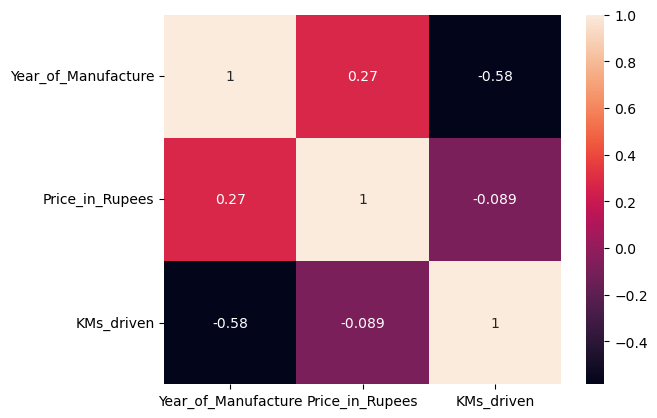

In [194]:
sns.heatmap(df.select_dtypes(include = np.number).corr(),annot = True)

In [195]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print(f"We have {len(numeric_features)} numeric_features: {numeric_features}")
print(f"We have {len(categorical_features)} categorical_features: {categorical_features}")

We have 3 numeric_features: ['Year_of_Manufacture', 'Price_in_Rupees', 'KMs_driven']
We have 5 categorical_features: ['Brand', 'Model', 'Fuel_Type', 'Location', 'Car_Age_Category']


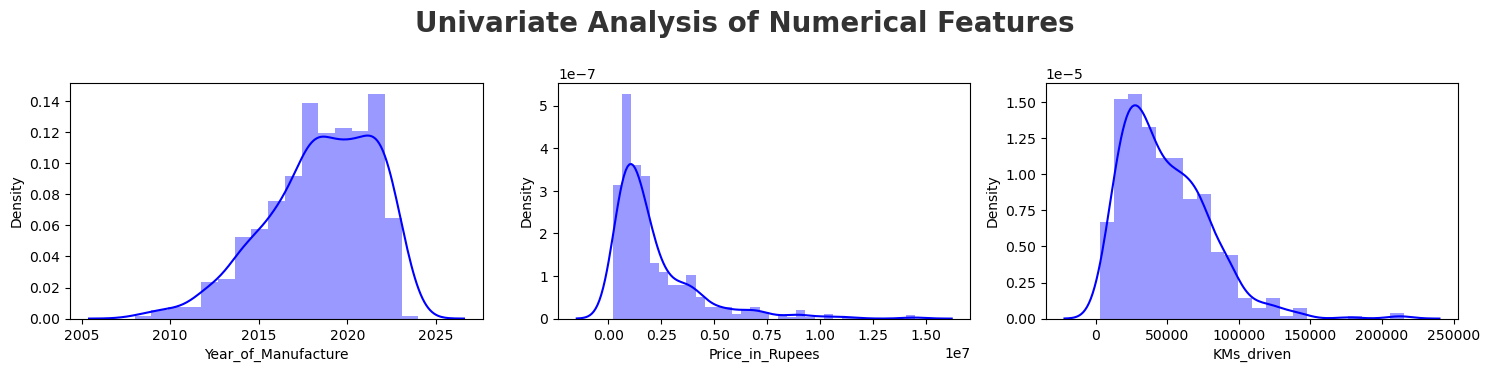

In [200]:
plt.figure(figsize=(15,15))
###The suptitle() method figure module of matplotlib library is used to Add a centered title to the figure.
plt.suptitle("Univariate Analysis of Numerical Features",fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.distplot(x=df[numeric_features[i]],color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# Visualization

1. Uni - Variate 

- single column analysis

    - a. Categorical
    - b. Numerical

# 1. Cat

ex: Vehicle_Grade - New, Moderate and Old
    
    

create a sub dataframe using brand, fuel, loca, veh grade

In [59]:

new_df = df[['Brand', 'Model', 'Fuel_Type']]

# Step 2: Display the new DataFrame
print(new_df)


              Brand                                             Model  \
0           Hyundai                              Creta 1 6 SX Plus AT   
1           Hyundai               Creta SX O 1 5 Petrol CVT 2020 2022   
2           Hyundai                     Creta SX 1 5 Petrol Executive   
3          Mahindra  XUV700 AX 7 Diesel AT AWD Luxury Pack 7 STR 2021   
4               BMW                3 Series 320d Sport Line 2016 2018   
...             ...                                               ...   
1171  Maruti Suzuki                         Celerio ZXi AMT 2019 2020   
1172          Honda                   Amaze 1 2 V MT Petrol 2018 2020   
1173          Honda                                     Elevate ZX MT   
1174           Tata                                   Harrier XZ Plus   
1175     Land Rover                    Range Rover Evoque HSE Dynamic   

     Fuel_Type  
0       Diesel  
1       Petrol  
2       Petrol  
3       Diesel  
4       Diesel  
...        ...  
1171

use for loop and plot all graphs

In [60]:
df

,Year of Manufacture,Brand,Model,Fuel_Type,location,price(₹),Distance_kms_driven,Vehicle_Grade
0,2016,Hyundai,Creta 1 6 SX Plus AT,Diesel,Singasandra,1175000.0,45315,old
1,2021,Hyundai,Creta SX O 1 5 Petrol CVT 2020 2022,Petrol,Singasandra,1685000.0,15925,moderate
2,2021,Hyundai,Creta SX 1 5 Petrol Executive,Petrol,Singasandra,1465000.0,5070,moderate
3,2022,Mahindra,XUV700 AX 7 Diesel AT AWD Luxury Pack 7 STR 2021,Diesel,Singasandra,2695000.0,29705,new
4,2020,BMW,3 Series 320d Sport Line 2016 2018,Diesel,BTM Layout,4525000.0,44244,moderate
...,...,...,...,...,...,...,...,...
1171,2015,Maruti Suzuki,Celerio ZXi AMT 2019 2020,Petrol,Koramangala 6th block,385000.0,96479,old
1172,2019,Honda,Amaze 1 2 V MT Petrol 2018 2020,Petrol,Koramangala 6th block,690000.0,13500,moderate
1173,2024,Honda,Elevate ZX MT,Petrol,Koramangala 6th block,1800000.0,400,new
1174,2022,Tata,Harrier XZ Plus,Diesel,Banaswadi,2200000.0,27000,new


In [201]:
df['Location'].value_counts()

Hebbal                    157
Singasandra                87
BTM Layout                 68
Basapura                   56
Adugodi                    43
Anand Nagar                43
Bettahalsoor               34
J. P. Nagar                28
Kengeri Satellite Town     27
Binnamangala               25
Banaswadi                  20
Name: Location, dtype: int64

pie, bar, count plot 

When working with a single categorical column in Python using Matplotlib, you have several plot types to visualize the data. Here are some of the most common ones:

### 1. **Bar Plot**
   - **Usage**: Displays the frequency of categories.
   - **Example**:
     ```python
     plt.bar(fuel_type_counts.index, fuel_type_counts.values)
     plt.show()
     ```

### 2. **Pie Chart**
   - **Usage**: Shows the proportion of each category as a slice of a pie.
   - **Example**:
     ```python
     plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%')
     plt.show()
     ```

### 3. **Count Plot** (using Seaborn with Matplotlib)
   - **Usage**: Similar to a bar plot but more aesthetically pleasing, often used to show counts of categorical data.
   - **Example**:
     ```python
     import seaborn as sns
     sns.countplot(x='Fuel_Type', data=df)
     plt.show()
     ```

### 4. **Dot Plot**
   - **Usage**: Displays each individual observation, often used to show distribution.
   - **Example**:
     ```python
     plt.plot(df['Fuel_Type'].value_counts().index, df['Fuel_Type'].value_counts().values, 'o')
     plt.show()
     ```

### 5. **Horizontal Bar Plot**
   - **Usage**: A horizontal version of the bar plot, useful for long category names.
   - **Example**:
     ```python
     plt.barh(fuel_type_counts.index, fuel_type_counts.values)
     plt.show()
     ```

### 6. **Stacked Bar Plot**
   - **Usage**: Visualizes multiple categorical variables, stacking their counts on top of each other.
   - **Note**: Requires a second categorical variable.
   - **Example**:
     ```python
     pd.crosstab(df['Category1'], df['Category2']).plot(kind='bar', stacked=True)
     plt.show()
     ```

### 7. **Box Plot** (with Seaborn or Matplotlib)
   - **Usage**: Typically used for numeric data, but can be adapted to show the spread of a categorical variable.
   - **Example**:
     ```python
     sns.boxplot(x='Fuel_Type', y='Some_Numeric_Column', data=df)
     plt.show()
     ```

These plots can help you visualize the distribution and proportions of categories in a single categorical column.

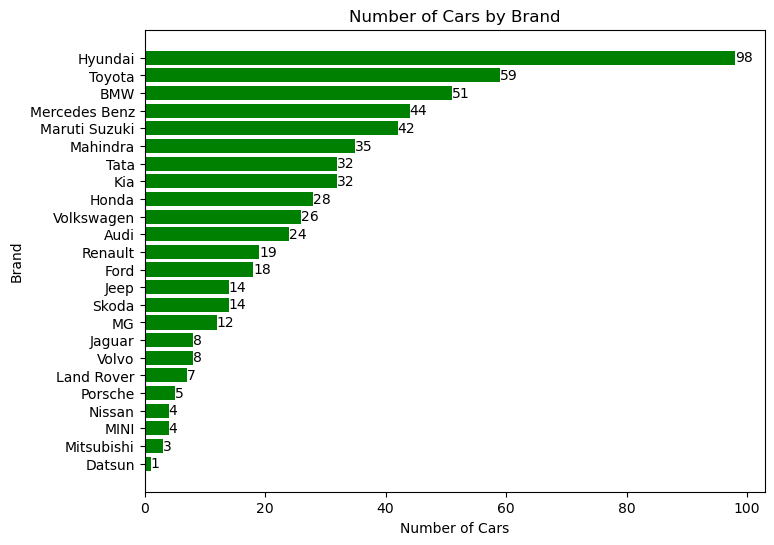

In [224]:


# Count the number of occurrences for each brand, sorted in descending order
brand_counts = df['Brand'].value_counts(ascending=True)

# Plotting the data
plt.figure(figsize=(8, 6))
bars = plt.barh(brand_counts.index, brand_counts.values, color='green')

# Display the count next to each bar
for bar in bars:
    xval = bar.get_width()  # Get the width of the bar (the count)
    plt.text(xval, bar.get_y() + bar.get_height()/2, int(xval), va='center')

# Add labels and title
plt.xlabel('Number of Cars')
plt.ylabel('Brand')
plt.title('Number of Cars by Brand')

# Show the plot
plt.show()


In [ ]:
Observation: 
- From the above plot we can observe that Hyundai cars are more for sale.
top 5 used cars for sale: 
least 

<Axes: ylabel='Brand'>

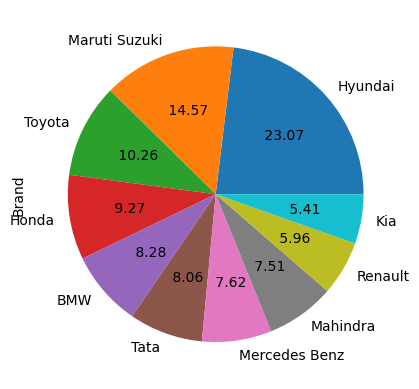

In [64]:
df['Brand'].value_counts()[0:10].plot.pie(autopct =' %.2f')

In [65]:
df['Fuel_Type'].value_counts()

Petrol                             674
Diesel                             452
Hybrid                              18
Electric                            11
Mild Hybrid(Electric + Petrol)       8
Petrol + 1                           5
CNG                                  3
Diesel + 1                           3
Mild Hybrid (Electric + Diesel)      1
LPG + 1                              1
Name: Fuel_Type, dtype: int64

<Axes: ylabel='Fuel_Type'>

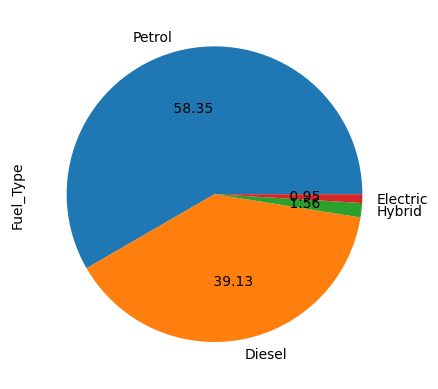

In [7]:
df['Fuel_Type'].value_counts()[0:4].plot.pie(autopct =' %.2f')

observation:
- most of the cars is of petrol type followed by diesel and hybrid.

<Axes: ylabel='Fuel_Type'>

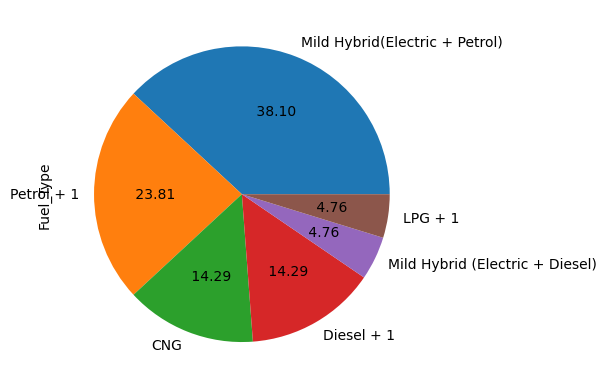

In [67]:
df['Fuel_Type'].value_counts()[4:].plot.pie(autopct =' %.2f')

observation:
- most of the cars is of petrol type followed by diesel and hybrid.

Numerical:
    
    Hist
    density

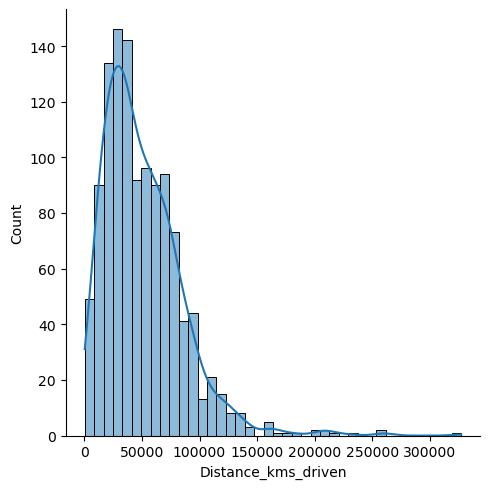

In [68]:
sns.displot( data=df["Distance_kms_driven"], kde=True )

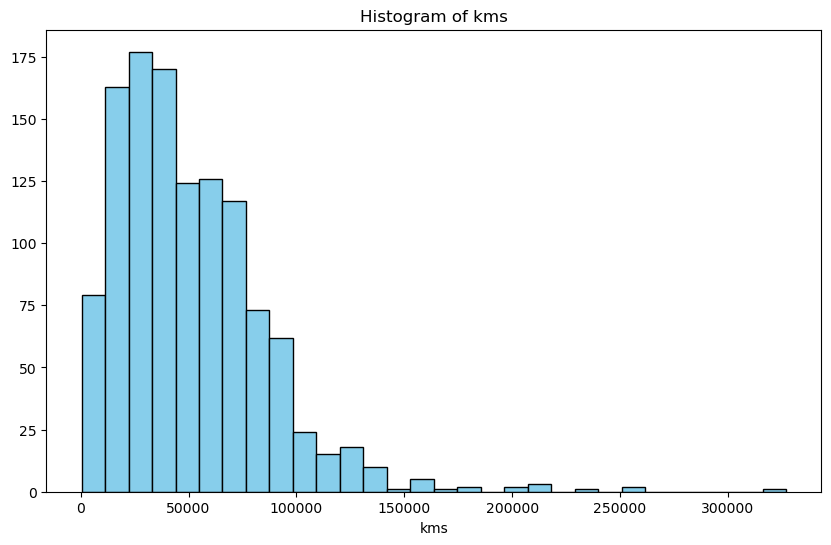

In [69]:
plt.figure(figsize=(10, 6))
plt.hist(df['Distance_kms_driven'], bins=30, color='skyblue', edgecolor='black')

# Step 2: Add labels and title
plt.xlabel('kms')
plt.title('Histogram of kms')

# Step 3: Show the plot
plt.show()

<Axes: xlabel='Distance_kms_driven'>

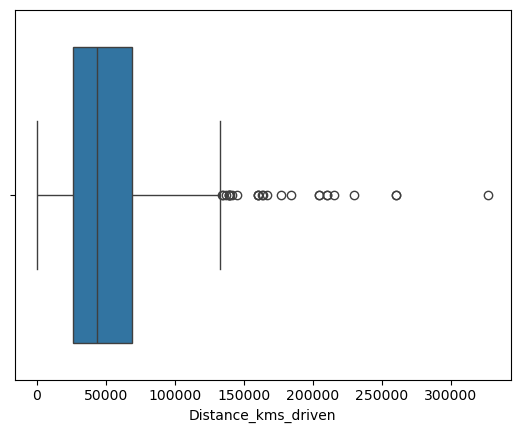

In [70]:
sns.boxplot(x = df['Distance_kms_driven'])

In [71]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re

- observation:- 
    - After 150000 the outlier has been started.

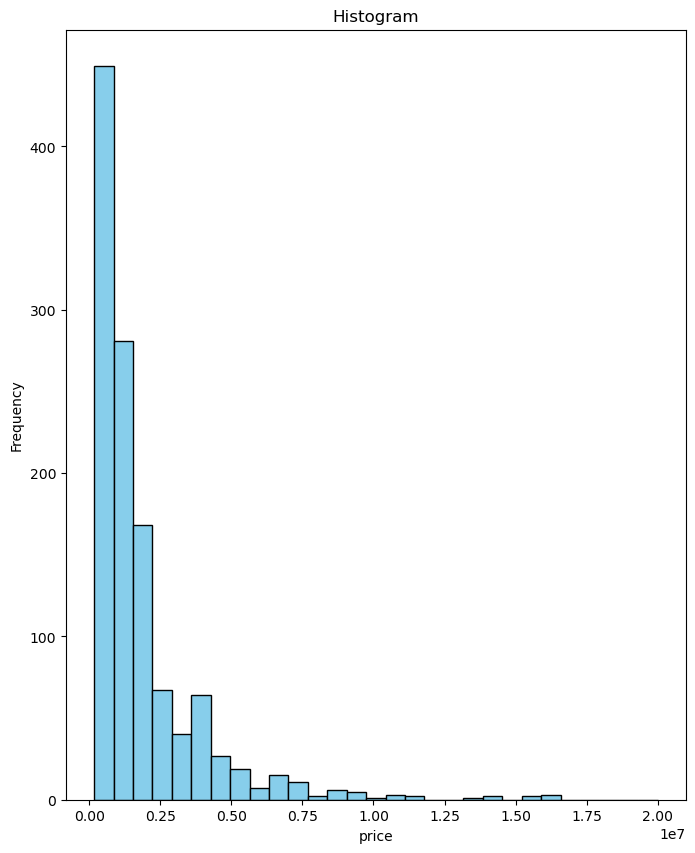

In [55]:
plt.figure(figsize=(8, 10))
bin_edges = np.linspace(170000, 20000000, num=30)  # 30 bins for demonstration

plt.hist(df['price(₹)'], bins=bin_edges, color='skyblue', edgecolor='black')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [56]:
df['price(₹)'].max()

28500000.0

In [57]:
df

,Year of Manufacture,Brand,Model,Fuel_Type,location,price(₹),Distance_kms_driven,Vehicle_Grade
0,2016,Hyundai,Creta 1 6 SX Plus AT 11 75 000 Make Offer 45 3...,Diesel,Singasandra,1175000.0,45315,old
1,2021,Hyundai,Creta SX O 1 5 Petrol CVT 2020 2022 16 85 000 ...,Petrol,Singasandra,1685000.0,15925,moderate
2,2021,Hyundai,Creta SX 1 5 Petrol Executive 14 65 000 Make O...,Petrol,Singasandra,1465000.0,5070,moderate
3,2022,Mahindra,XUV700 AX 7 Diesel AT AWD Luxury Pack 7 STR 20...,Diesel,Singasandra,2695000.0,29705,new
4,2018,Mahindra,XUV500 W7 AT 2018 2020 13 45 000 Make Offer 49...,Diesel,Singasandra,1345000.0,49131,moderate
...,...,...,...,...,...,...,...,...
1171,2022,Toyota,Fortuner 4X4 MT 2 8 Diesel 41 00 000 Make Offe...,Diesel,Banaswadi,4100000.0,25313,new
1172,2018,Land Rover,Range Rover Evoque SE 43 50 000 Make Offer Hom...,Diesel,Bilekahalli,4350000.0,69336,moderate
1173,2017,Honda,Brio S MT 4 45 000 Make Offer Home Test Drive ...,Petrol,Bilekahalli,445000.0,70986,moderate
1174,2022,Tata,Nexon XZ Plus O Diesel Dark Edition 12 50 000 ...,Diesel,Banaswadi,1250000.0,50000,new
